In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [41]:
# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset
data_path = r'E:\DijiKent\USAHouseDataAnalysis\Data\HouseDataNew.csv'
data = pd.read_csv(data_path)

# Step 1: Missing Data Analysis
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Display missing data summary
print("Missing Data Summary:")
print(missing_summary)

Missing Data Summary:
                   Missing Values  Percentage
prev_sold_date             215379   65.681350
acre_lot                    66630   20.319290
lot_size_category           66630   20.319290
bed_bath_ratio              64718   19.736212
bed                         63412   19.337938
bath                        62353   19.014989
price_per_sqft              60827   18.549624
house_size                  60827   18.549624
zip_code                      197    0.060077
city                           52    0.015858
state                           0    0.000000
status                          0    0.000000
price                           0    0.000000
price_category                  0    0.000000


In [42]:
# Step 2: Handling Missing Data
# Define strategies for missing data handling
# Filling numerical columns with median values
numerical_cols = ['bed', 'bath', 'acre_lot', 'house_size', 'price_per_sqft', 'bed_bath_ratio']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Dropping columns with high missing percentages
columns_to_drop = ['prev_sold_date', 'lot_size_category']
data = data.drop(columns=columns_to_drop)

# Filling categorical columns with the most frequent value
categorical_cols = ['city', 'zip_code']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Recheck missing data
missing_data_after = data.isnull().sum()
missing_percentage_after = (missing_data_after / len(data)) * 100

missing_summary_after = pd.DataFrame({
    'Missing Values': missing_data_after,
    'Percentage': missing_percentage_after
}).sort_values(by='Missing Values', ascending=False)

# Display updated missing data summary
print("Updated Missing Data Summary:")
print(missing_summary_after)


Updated Missing Data Summary:
                Missing Values  Percentage
status                       0         0.0
bed                          0         0.0
bath                         0         0.0
acre_lot                     0         0.0
city                         0         0.0
state                        0         0.0
zip_code                     0         0.0
house_size                   0         0.0
price                        0         0.0
price_per_sqft               0         0.0
price_category               0         0.0
bed_bath_ratio               0         0.0


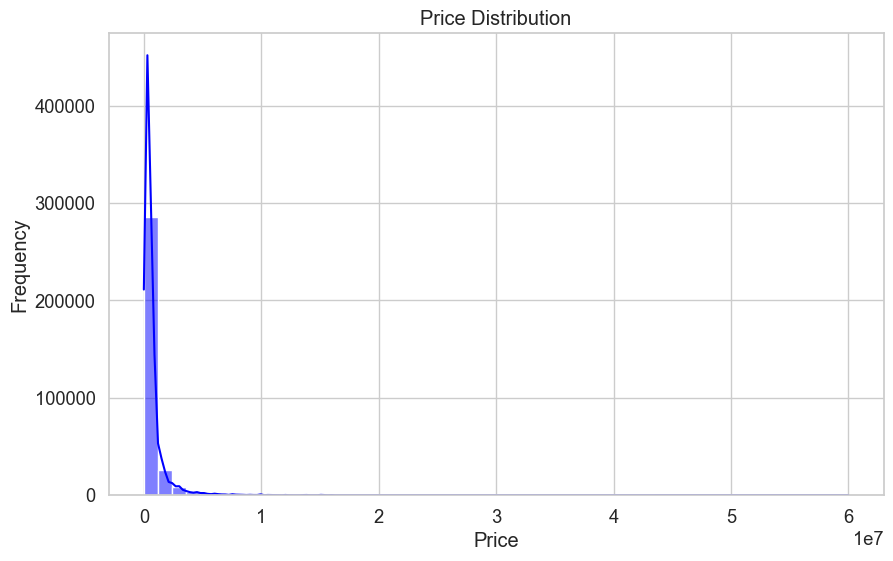

In [43]:
# Step 3: Data Visualization
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=50, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


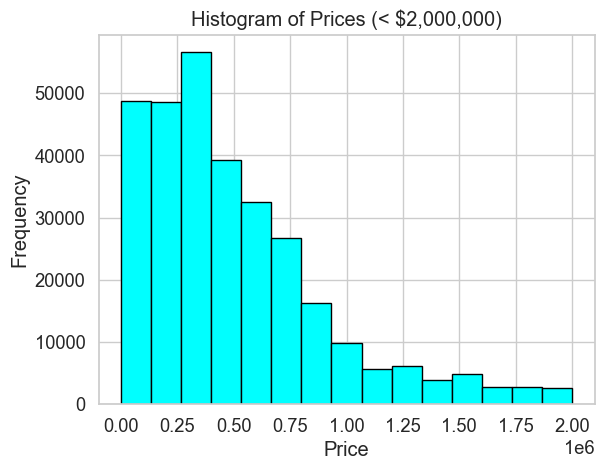

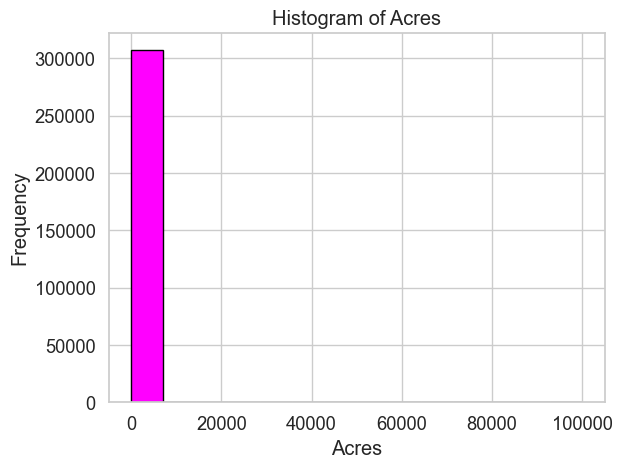

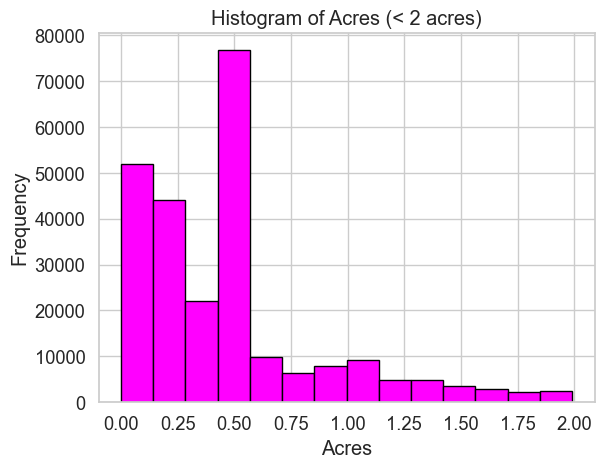

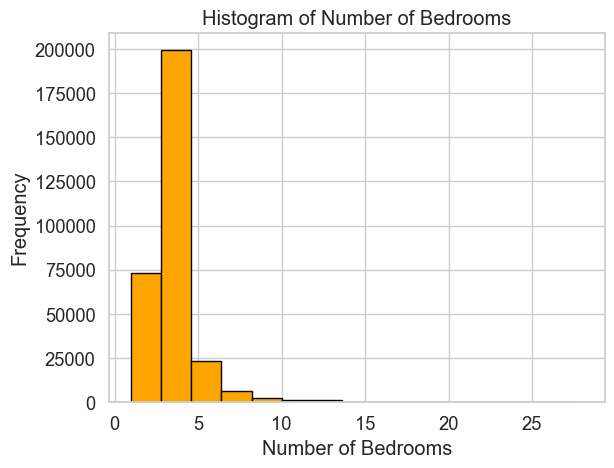

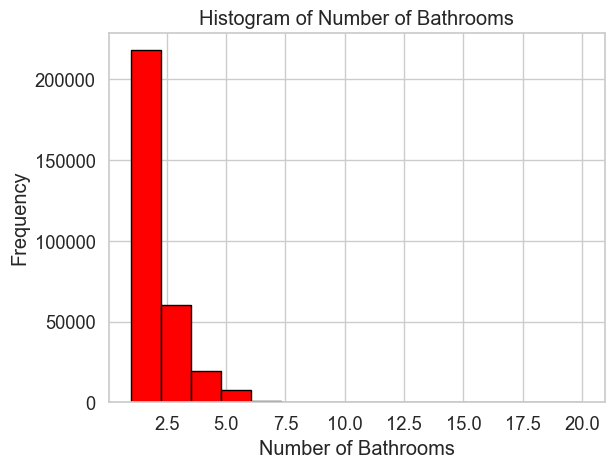

In [ ]:
# Create a histogram for the 'price' variable
plt.hist(filtered_data['price'], bins=15, color='cyan', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices (< $2,000,000)')
plt.show()



filtered_acres = filtered_data[filtered_data['acre_lot'] < 2]
# Create a histogram for the 'acre_lot' variable, but filtered
plt.hist(filtered_acres['acre_lot'], bins=14, color='magenta', edgecolor='black')
plt.xlabel('Acres')
plt.ylabel('Frequency')
plt.title('Histogram of Acres (< 2 acres)')
plt.show()

# Create a histogram for the 'bed' variable
plt.hist(filtered_data['bed'], bins=15, color='orange', edgecolor='black')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bedrooms')
plt.show()

# Create a histogram for the 'bath' variable
plt.hist(filtered_data['bath'], bins=15, color='red', edgecolor='black')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bathrooms')
plt.show()


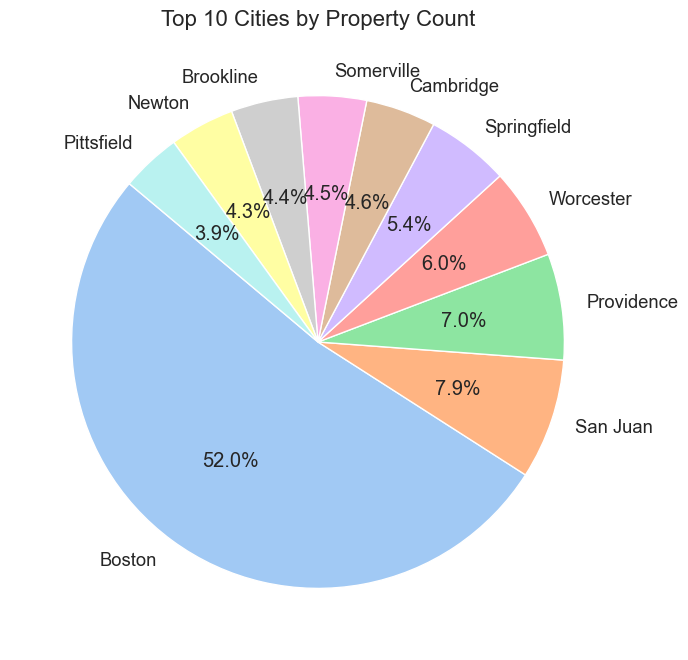

In [45]:
# 5. Pie Chart for Property Distribution by City
plt.figure(figsize=(10, 8))
city_counts = data['city'].value_counts().nlargest(10)
plt.pie(city_counts.values, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 10 Cities by Property Count', fontsize=16)
plt.show()

In [46]:
# Step 3: Advanced Data Visualization
sns.set(style="whitegrid", font_scale=1.2)  # Set global style and font size


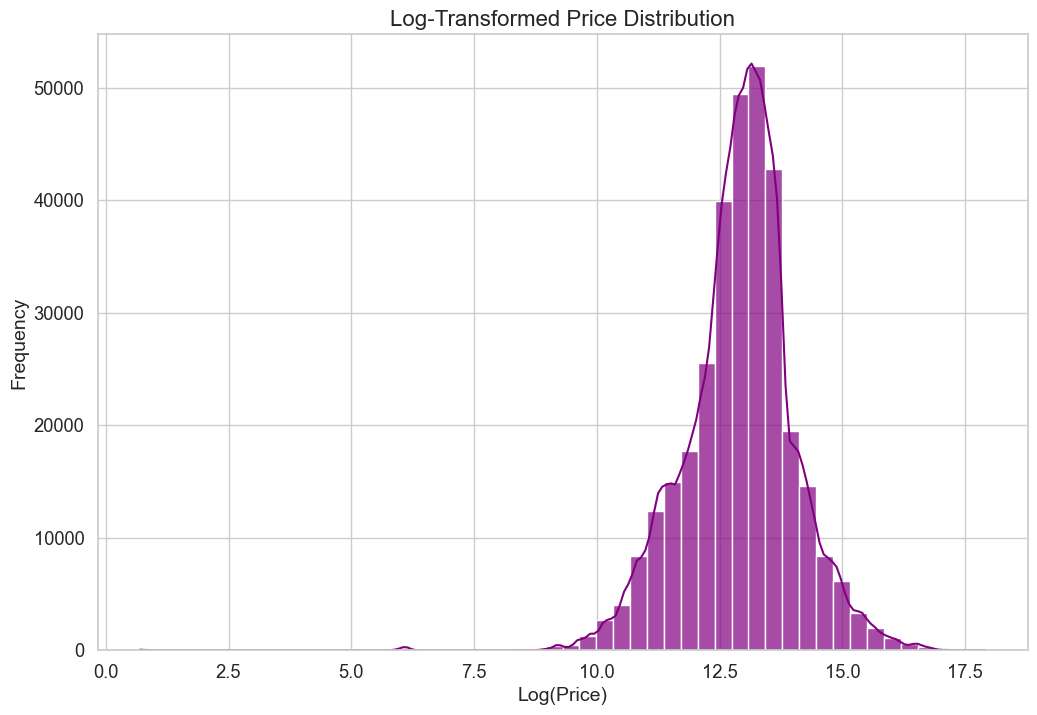

In [47]:

# 1. Distribution of Price with Log Transformation
plt.figure(figsize=(12, 8))
sns.histplot(np.log1p(data['price']), kde=True, bins=50, color='purple', alpha=0.7)
plt.title('Log-Transformed Price Distribution', fontsize=16)
plt.xlabel('Log(Price)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

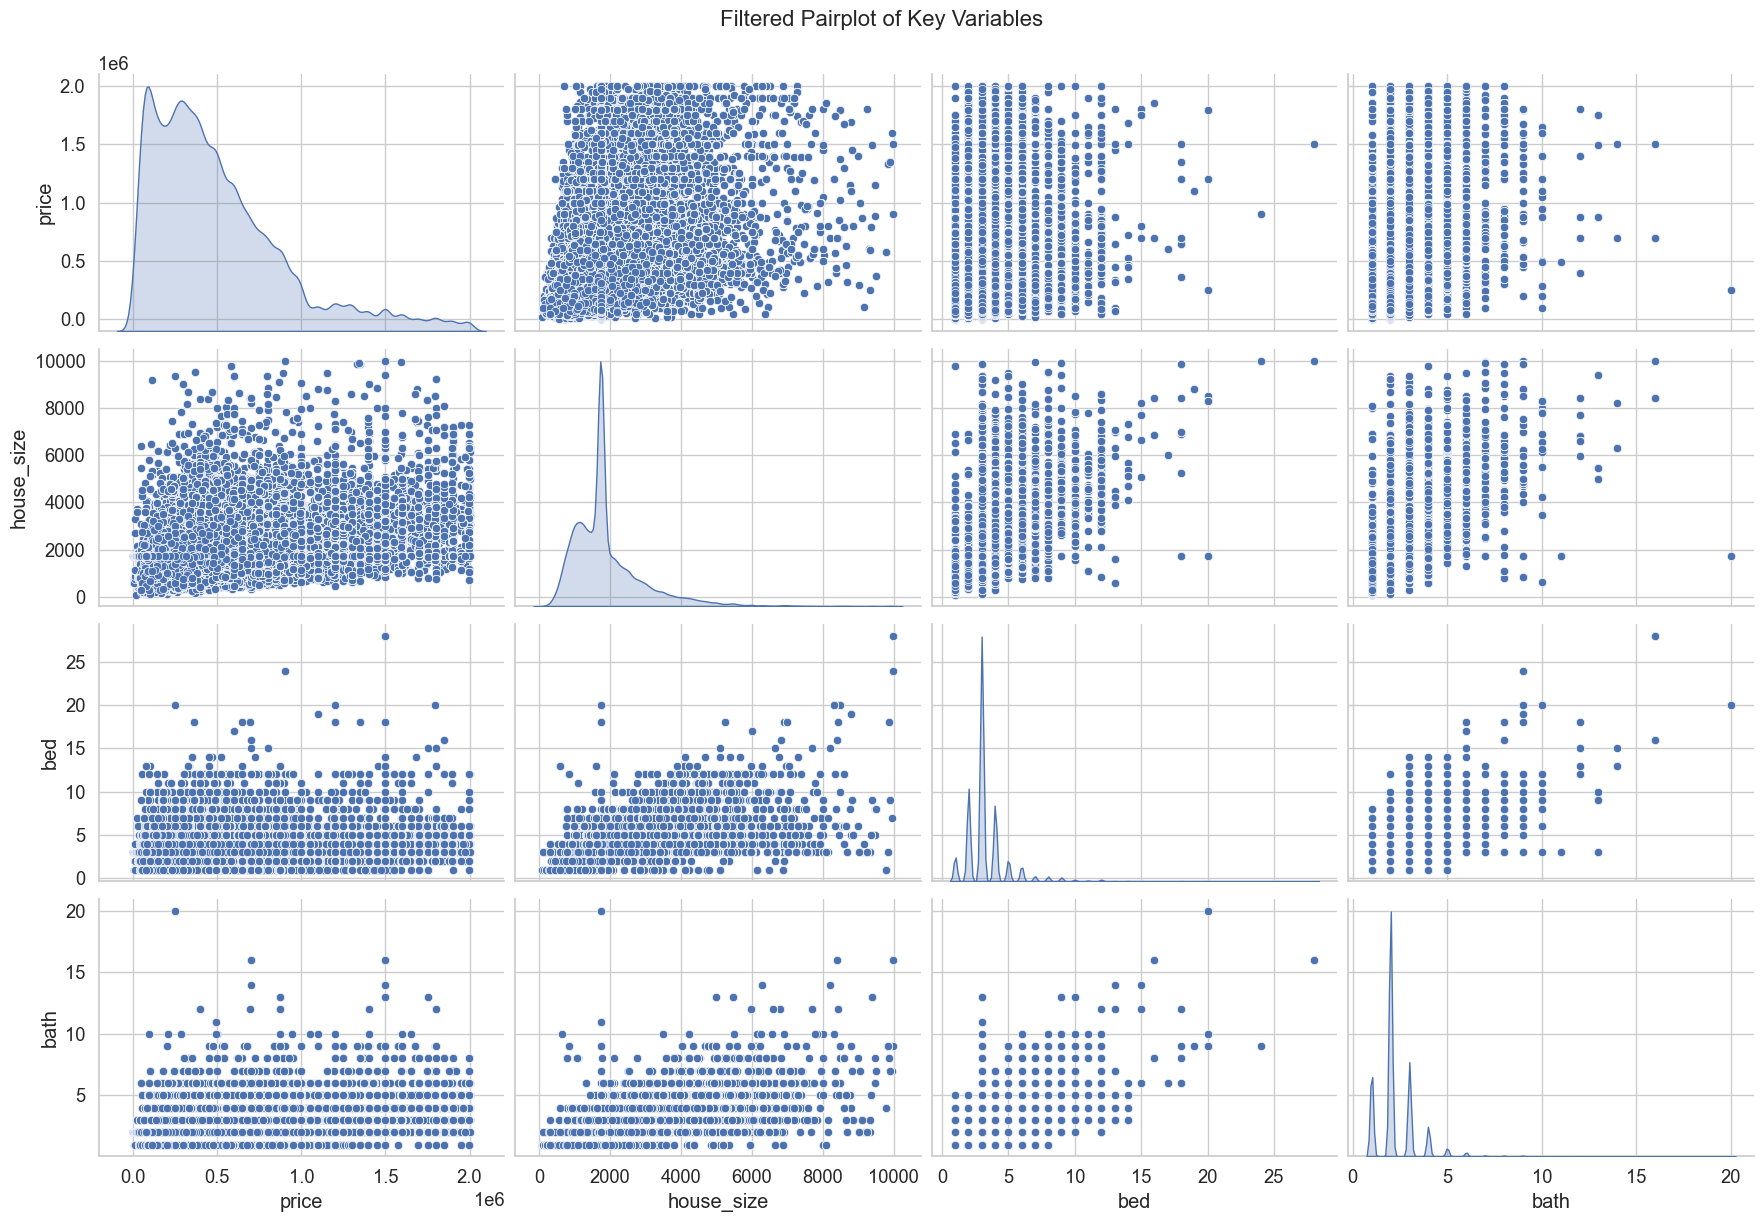

In [48]:
# 1. Filtered Pairplot for Key Numerical Variables (Remove Outliers)
filtered_data = data[(data['price'] < 2000000) & (data['house_size'] < 10000)]
sns.pairplot(filtered_data, vars=['price', 'house_size', 'bed', 'bath'], kind='scatter', diag_kind='kde', height=3, aspect=1.5, palette='coolwarm')
plt.suptitle('Filtered Pairplot of Key Variables', y=1.02, fontsize=16)
plt.show()

In [49]:
# 2. Heatmap of Top States and Cities by Price
# Select top 10 states and cities by average price
top_states = data.groupby('state')['price'].mean().nlargest(10).index
top_cities = data.groupby('city')['price'].mean().nlargest(10).index

state_city_price = data[data['state'].isin(top_states) & data['city'].isin(top_cities)]
heatmap_data = state_city_price.pivot_table(values='price', index='state', columns='city', aggfunc='mean')


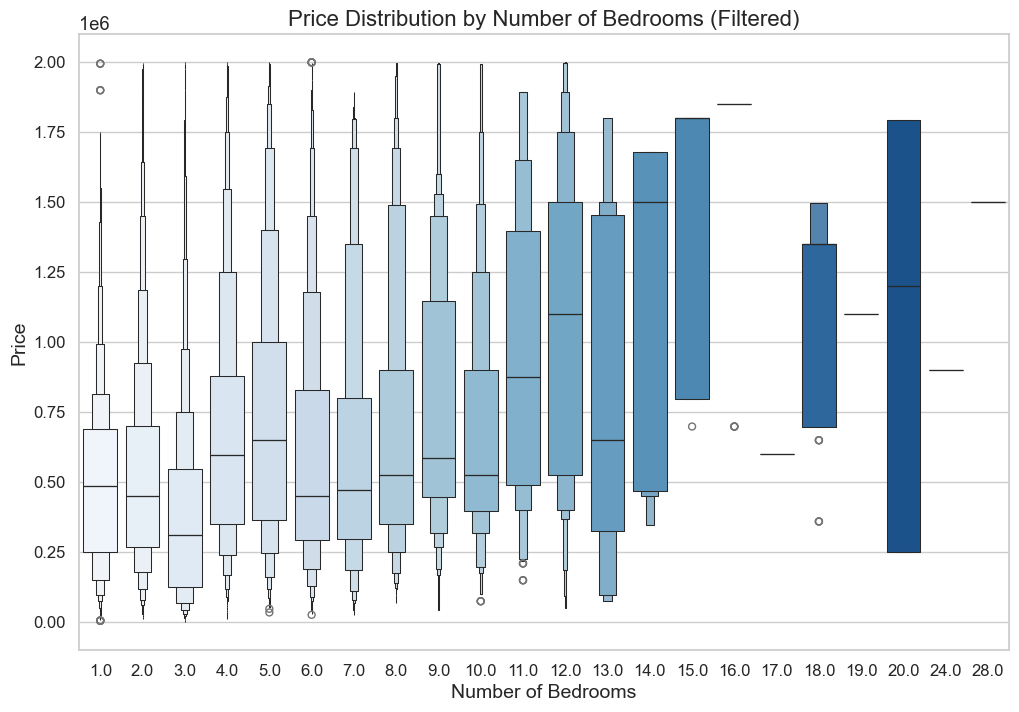

In [50]:
# 3. Boxenplot of Price by Bed Count
plt.figure(figsize=(12, 8))
sns.boxenplot(x='bed', y='price', data=filtered_data, palette='Blues')
plt.title('Price Distribution by Number of Bedrooms (Filtered)', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

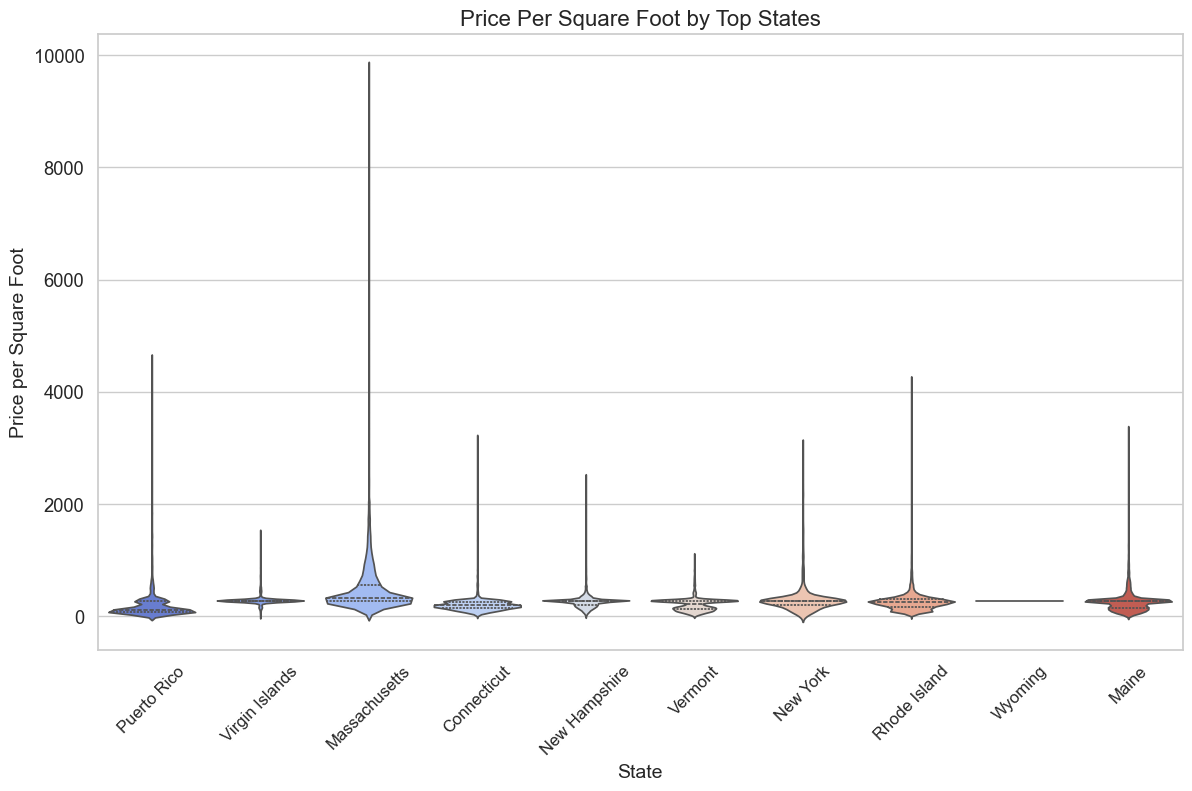

In [51]:
# 4. Violin Plot of Price Per Square Foot by State (Top States)
plt.figure(figsize=(14, 8))
filtered_data_top_states = data[data['state'].isin(top_states)]
sns.violinplot(x='state', y='price_per_sqft', data=filtered_data_top_states, inner='quartile', palette='coolwarm')
plt.title('Price Per Square Foot by Top States', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('State', fontsize=14)
plt.ylabel('Price per Square Foot', fontsize=14)
plt.show()


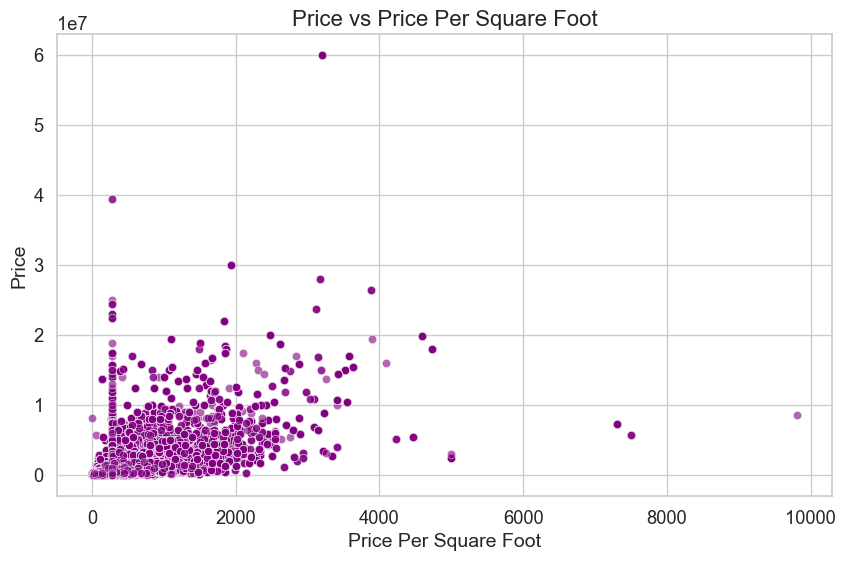

In [52]:
# 1. Price vs Price Per Square Foot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_per_sqft', y='price', data=data, alpha=0.6, color='purple')
plt.title('Price vs Price Per Square Foot', fontsize=16)
plt.xlabel('Price Per Square Foot', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

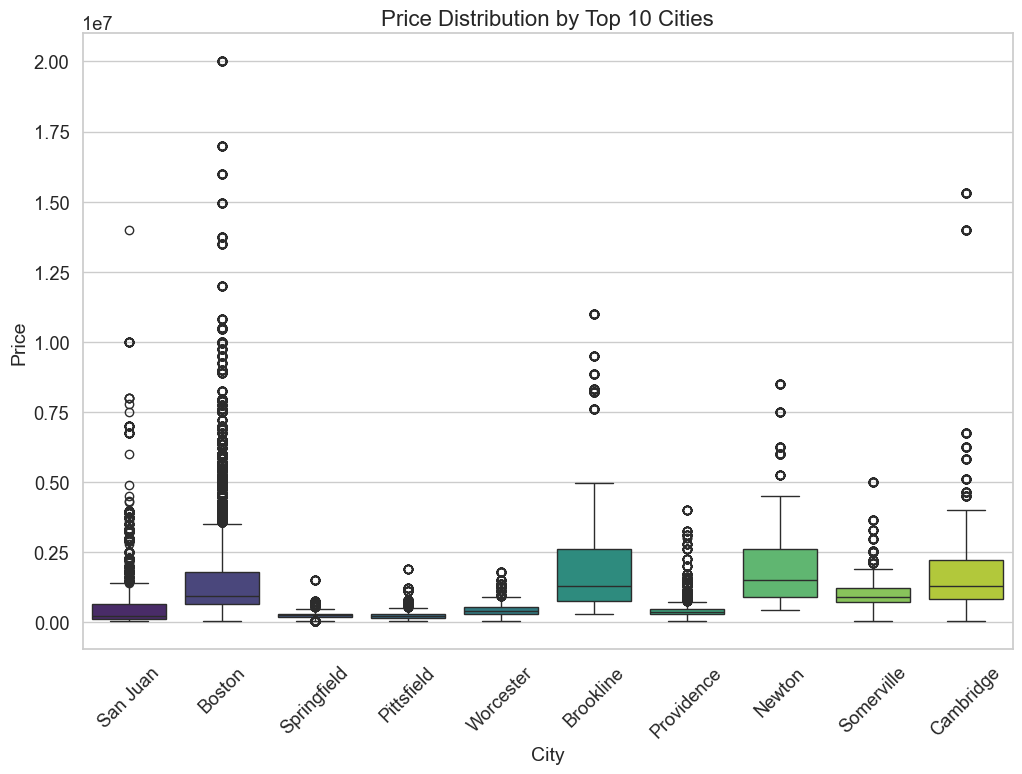

In [53]:
# 3. Price Distribution by Top 10 Cities
plt.figure(figsize=(12, 8))
city_counts = data['city'].value_counts().head(10)
filtered_cities = data[data['city'].isin(city_counts.index)]
sns.boxplot(x='city', y='price', data=filtered_cities, palette='viridis')
plt.title('Price Distribution by Top 10 Cities', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.show()


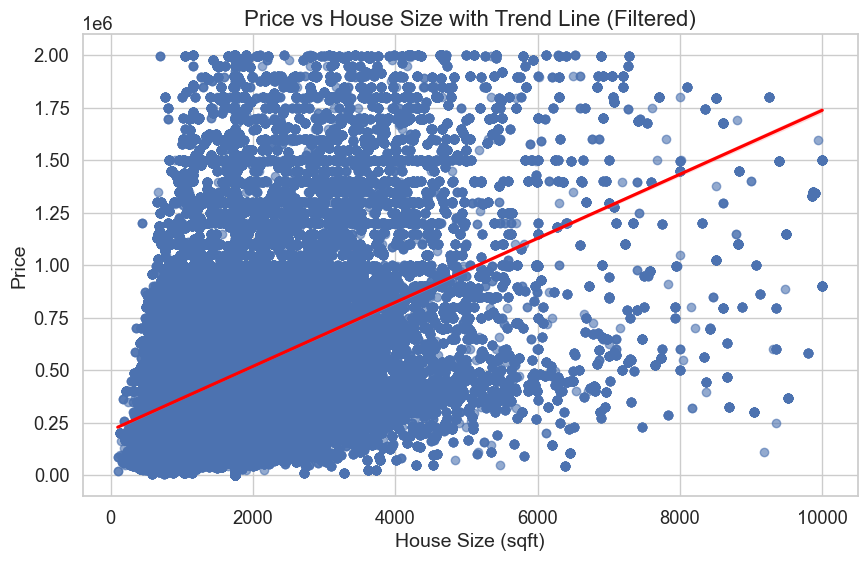

In [54]:
# 4. Price vs House Size with Trend Line (Filtered Data)
filtered_data = data[(data['price'] < 2000000) & (data['house_size'] < 10000)]
plt.figure(figsize=(10, 6))
sns.regplot(x='house_size', y='price', data=filtered_data, scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title('Price vs House Size with Trend Line (Filtered)', fontsize=16)
plt.xlabel('House Size (sqft)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

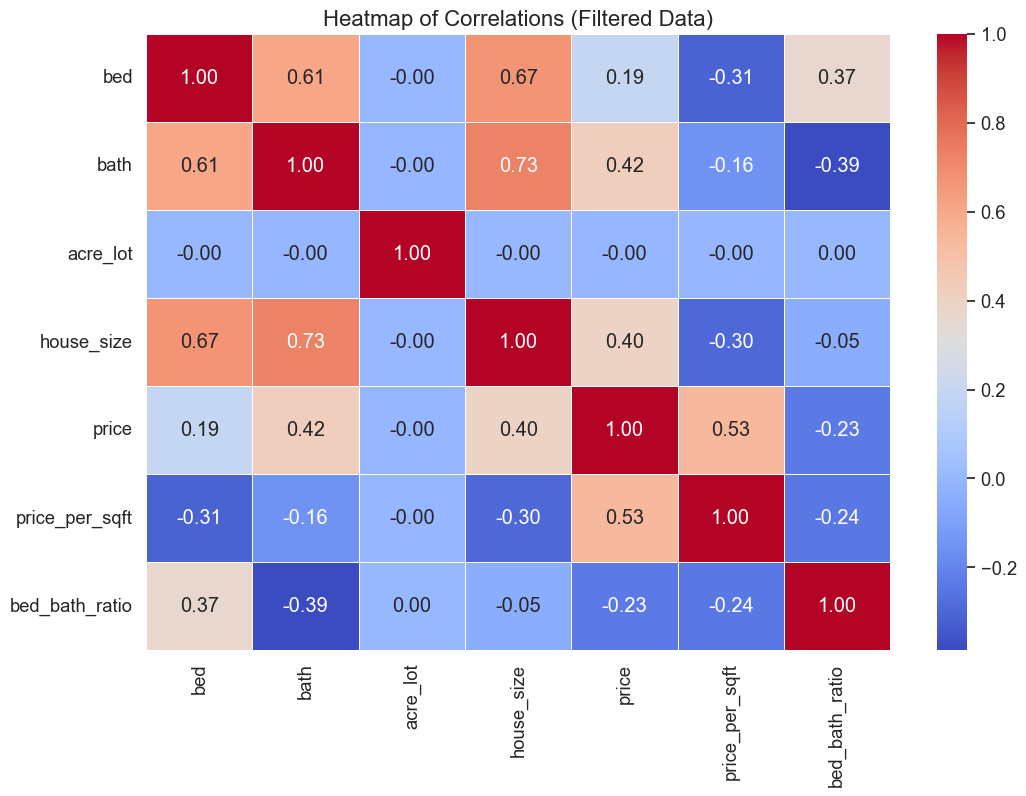

In [56]:
# Step 6: Heatmap of Correlations
# Drop less relevant columns and filter the dataset
filtered_heatmap_data = data.drop(columns=['zip_code', 'city', 'state', 'status'])
filtered_heatmap_data = filtered_heatmap_data[(filtered_heatmap_data['price'] < 2000000) & (filtered_heatmap_data['house_size'] < 10000)]

# Select only numerical columns
numerical_filtered_data = filtered_heatmap_data.select_dtypes(include=[np.number])

# Generate correlation matrix
correlation_matrix = numerical_filtered_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Heatmap of Correlations (Filtered Data)', fontsize=16)
plt.show()